## **install and import dependencies**

In [ ]:
import torch
import requests
import re
from bs4 import BeautifulSoup
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
import pandas as pd

## **initiate models**

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

## **encode and calculate sentiment**

In [ ]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')

In [ ]:
result = model(tokens)

In [ ]:
result.logits

tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward0>)

In [ ]:
int(torch.argmax(result.logits))+1

4

## **collect reviews**

In [ ]:
r = requests.get('https://www.yelp.com/biz/social-brew-cafe-pyrmont')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [ ]:
reviews

["Very cute coffee shop and restaurant. They have a lovely outdoor seating area and several tables inside.  It was fairly busy on a Tuesday morning but we were to grab the last open table. The server was so enjoyable, she chatted and joked with us and provided fast service with our ordering, drinks and meals. The food was very good. We ordered a wide variety and every meal was good to delicious. The sweet potato fries on the Chicken Burger plate were absolutely delicious, some of the best I've ever had. I definitely enjoyed this cafe, the outdoor seating, the service and the food!!",
 "Six of us met here for breakfast before our walk to Manly. We were enjoying visiting with each other so much that I apologize for not taking any photos. We all enjoyed our food, as well as our coffee and tea drinks.We were greeted immediately by a friendly server asking if we would like to sit inside or out. We said we would like inside, but weren't exactly sure how many were joining us yet- at least 4. 

## **load revies to data frame and score**

In [ ]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [ ]:
df['review'].iloc[0]

"Very cute coffee shop and restaurant. They have a lovely outdoor seating area and several tables inside.  It was fairly busy on a Tuesday morning but we were to grab the last open table. The server was so enjoyable, she chatted and joked with us and provided fast service with our ordering, drinks and meals. The food was very good. We ordered a wide variety and every meal was good to delicious. The sweet potato fries on the Chicken Burger plate were absolutely delicious, some of the best I've ever had. I definitely enjoyed this cafe, the outdoor seating, the service and the food!!"

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [ ]:
sentiment_score(df['review'].iloc[1])

4

In [ ]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [ ]:
df

,review,sentiment
0,Very cute coffee shop and restaurant. They hav...,4
1,Six of us met here for breakfast before our wa...,4
2,We came for brunch and they ran out of seven s...,2
3,The food was delicious. The ricotta pancakes w...,4
4,Great place with delicious food and friendly s...,5
5,Great food amazing coffee and tea. Short walk ...,5
6,"Great service, lovely location, and really ama...",5
7,Ricotta hot cakes! These were so yummy. I ate ...,5
8,We came for brunch twice in our week-long visi...,4
9,It was ok. Had coffee with my friends. I'm new...,3


In [ ]:
df['review'].iloc[3]

'The food was delicious. The ricotta pancakes were light and tasty.  The cream brûlée French toast was a fruit lovers delight. There was fresh strawberries, blueberries, passion fruit and custard. No syrup required. And crispy kale as a side ordered with eggs. Worth the walk over the Pyrmont bridge.'

In [30]:
sentiment_score(df['review'].iloc[1])

4

In [31]:
sentiment_score(df['review'].iloc[5])

5

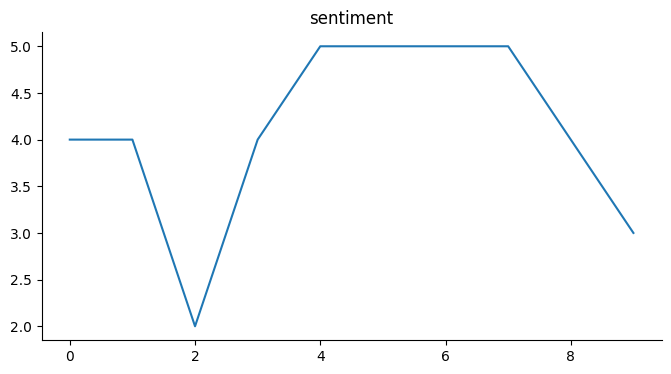

In [36]:
# @title sentiment

from matplotlib import pyplot as plt
df['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)